Random: 0; accuracy: 0.35175879396984927


/Users/hiber/miniforge3/envs/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Random: 1; accuracy: 0.7185929648241206


/Users/hiber/miniforge3/envs/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Random: 2; accuracy: 0.6532663316582915


/Users/hiber/miniforge3/envs/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Random: 3; accuracy: 0.6532663316582915


/Users/hiber/miniforge3/envs/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Random: 5; accuracy: 0.6532663316582915


/Users/hiber/miniforge3/envs/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Perceptron:  0.35175879396984927 0.6532663316582915 0.7185929648241206 0.12962876251164804
Perceptron with Norm:  0.6030150753768844 0.7487437185929648 0.8241206030150754 0.07673812731184353
MLP:  0.6532663316582915 0.6532663316582915 0.6532663316582915 0.0
MLP with Norm:  0.8894472361809045 0.8894472361809045 0.8944723618090452 0.0020100502512562903


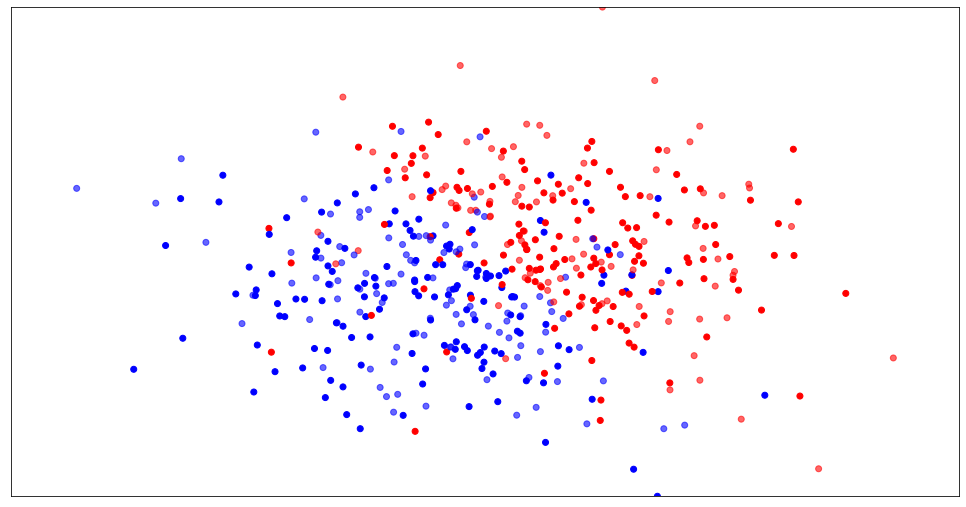

In [3]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


def median(lst):
    return np.median(np.array(lst))


data_train = pandas.read_csv('perceptron-train.csv')
X_train = data_train.iloc[:, 1:3].values
y_train = data_train.iloc[:, 0].values

data_test = pandas.read_csv('perceptron-test.csv')
X_test = data_test.iloc[:, 1:3].values
y_test = data_test.iloc[:, 0].values


rs = np.linspace(0,5,num=5)

acc_p = []
acc_pn = []
acc_mlp = []
acc_mlpn = []

for i in rs:
    i = int(i)
    clf = Perceptron(random_state=i, alpha=0.01, max_iter=2000)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Random: {}; accuracy: {}".format(i, acc))
    acc_p.append(acc)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = Perceptron(random_state=i, alpha=0.01, max_iter=2000)
    clf.fit(X_train_scaled, y_train)
    predictions = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    # print "Perceptron with normalization: ", acc
    acc_pn.append(acc)

    mlp = MLPClassifier(random_state=i, solver="sgd", activation="tanh", alpha=0.01, hidden_layer_sizes=(20, ), max_iter=2000, tol=0.00000001)
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    # print "MLP: ",  acc
    acc_mlp.append(acc)

    mlp = MLPClassifier(random_state=i, solver="sgd", activation="tanh", alpha=0.01, hidden_layer_sizes=(1230, 1230, 1230), max_iter=2000, tol=0.00000001)
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    # print "MLP: ",  acc
    acc_mlpn.append(acc)

print("Perceptron: ", min(acc_p), median(acc_p), max(acc_p), np.std(acc_p))
print("Perceptron with Norm: ", min(acc_pn), median(acc_pn), max(acc_pn), np.std(acc_pn))
print("MLP: ", min(acc_mlp), median(acc_mlp), max(acc_mlp), np.std(acc_mlp))
print("MLP with Norm: ", min(acc_mlpn), median(acc_mlpn), max(acc_mlpn), np.std(acc_mlpn))

X = np.concatenate((X_train, X_test), axis=0)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

figure = plt.figure(figsize=(17, 9))
cm = plt.cm.RdBu
cm_bright = mpl.colors.ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 1, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
plt.show()